# Power Spectral Density Randomizer

Below code will be used to randomize light color asuming it is being produced by a light bulb with a temperature rating T (K). To do this, I will radomize the frequencies by choosing a random frequency with uniform probabilty and then a random value of spectral radiance with uniform probability. If the random value of spectral radiance is less than the value of Planck's law calculated with the random frequency I will store the random frequency, otherwise I will repeat the random sampling. I will do this until I have N frequencies.

Planck's Law
$B(\nu,T) = \frac{2h\nu^3}{c^2}\frac{1}{e^{\frac{h\nu}{k_BT}}-1}$

Aside: This is Planck's law in 3D, I think that will be correct for our idea, but I have not completely thought it through

In [99]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.auto import tqdm
from scipy import special as sf
import pandas as pd

In [63]:
T=5800 #Temperature in Kelvin (5800 is approximately the BB-temp of sun)
N=1000000 #number of samples we want
f=[] #list of frequencies, to be filled
c= 3*10**8 #constant speed of light in m/s
h = 6.6261*10**(-34) #Planck's constant in J/s
kB = 1.381*10**(-23) #Boltzmann constant in 1/K
wF = 3.157*kB*T/h #This is Wien's frequency, using Wien's law, calculate the peak frequency, use this to get the domain of interest

In [64]:
def p_law(f):
    return (2*h*f**3/(c**2))*(1/(np.exp(h*f/(kB*T))-1))

In [65]:
def generator():
    i=0
    while i<=N:
        nu = np.random.uniform(low = .001*wF, high = 5*wF)
        B = np.random.uniform(high = 1.05*p_law(wF))
        if B<p_law(nu):
            f.append(nu)
            i+=1
            yield

        else:
            pass
    
        
for _ in tqdm(generator(), total = N+1): pass

  0%|          | 0/1000001 [00:00<?, ?it/s]

<AxesSubplot:ylabel='Count'>

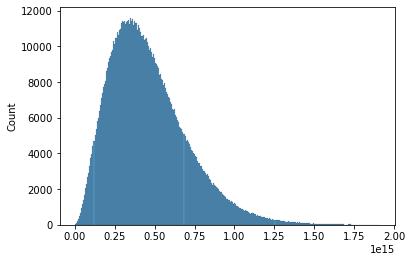

In [66]:
sns.histplot(f)

# Coupling Effiency
In the code below, we will choses a random angle between 0 and 90 degrees. This angle will represent the polarization of a photon. This will be chosen from a uniform distribution as we want to describe light being generated from a lightbulb.

In [69]:
theta = np.random.uniform(high = np.pi/2)

In [72]:
epc=1/2*(np.cos(theta)-np.sin(theta))

# Radiation Direction
In the code below, we want to describe the the direction -- which we will do using a polar and azimuthal angle -- 

In [172]:
sigma=1.1
a=2
xi=sf.erf(a/(2*sigma))

n=0
xs=[]
ys=[]
n=10000000

u = np.random.uniform(low = 0, high = 1, size = (2,n))

x=sigma*sf.erfinv(2*xi*u[0]-xi)   
y=sigma*sf.erfinv(2*xi*u[1]-xi)



In [173]:
a = u[1][0]/(u[0][0]-1)
2*xi*a-xi

-13.983563662512694

(array([[312., 351., 346., ..., 341., 321., 305.],
        [328., 337., 352., ..., 365., 293., 369.],
        [318., 394., 365., ..., 385., 382., 380.],
        ...,
        [350., 378., 404., ..., 352., 357., 348.],
        [337., 331., 374., ..., 348., 334., 351.],
        [326., 331., 366., ..., 344., 316., 309.]]),
 array([-9.99999695e-01, -9.79999701e-01, -9.59999708e-01, -9.39999714e-01,
        -9.19999721e-01, -8.99999727e-01, -8.79999734e-01, -8.59999740e-01,
        -8.39999747e-01, -8.19999753e-01, -7.99999759e-01, -7.79999766e-01,
        -7.59999772e-01, -7.39999779e-01, -7.19999785e-01, -6.99999792e-01,
        -6.79999798e-01, -6.59999805e-01, -6.39999811e-01, -6.19999818e-01,
        -5.99999824e-01, -5.79999830e-01, -5.59999837e-01, -5.39999843e-01,
        -5.19999850e-01, -4.99999856e-01, -4.79999863e-01, -4.59999869e-01,
        -4.39999876e-01, -4.19999882e-01, -3.99999888e-01, -3.79999895e-01,
        -3.59999901e-01, -3.39999908e-01, -3.19999914e-01, -2.99999921e

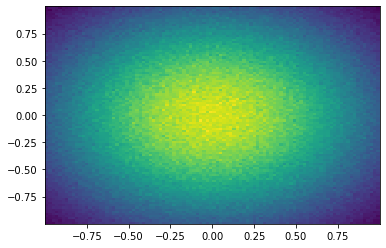

In [174]:
plt.hist2d(x, y, bins = 100)
#plt.plot(x,y,'o')

In [111]:
xs=np.arange(-a/2,a/2,.01)
ys=np.arange(-a/2,a/2,.01)
d=[]
for x in xs:
    for y in ys:
        d.append([x,y,1/(4*xi**2)*((sf.erf(x/sigma)+xi)*(sf.erf(y/sigma)+xi))])

f=pd.DataFrame(data =d, columns = ['x','y','z'])

<AxesSubplot:xlabel='y', ylabel='x'>

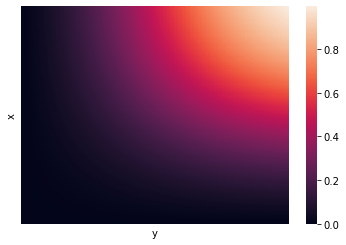

In [123]:
glue = f.pivot(index="x", columns="y", values="z")
sns.heatmap(glue.iloc[::-1],xticklabels=False,yticklabels=False)

In [124]:
glue.iloc[::-1]

y,-1.00,-0.99,-0.98,-0.97,-0.96,-0.95,-0.94,-0.93,-0.92,-0.91,...,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
x,,,,,,,,,,,,,,,,,,,,,
0.99,0.0,0.002481,0.005013,0.007594,0.010226,0.012908,0.015643,0.018429,0.021267,0.024158,...,0.970410,0.973354,0.976245,0.979084,0.981870,0.984604,0.987287,0.989919,0.992500,0.995031
0.98,0.0,0.002475,0.005000,0.007574,0.010200,0.012876,0.015603,0.018382,0.021213,0.024097,...,0.967941,0.970878,0.973762,0.976593,0.979372,0.982099,0.984775,0.987400,0.989975,0.992500
0.97,0.0,0.002469,0.004987,0.007555,0.010173,0.012842,0.015562,0.018334,0.021158,0.024034,...,0.965424,0.968353,0.971229,0.974053,0.976825,0.979545,0.982214,0.984833,0.987400,0.989919
0.96,0.0,0.002462,0.004974,0.007535,0.010146,0.012808,0.015521,0.018285,0.021102,0.023970,...,0.962857,0.965779,0.968647,0.971464,0.974228,0.976941,0.979603,0.982214,0.984775,0.987287
0.95,0.0,0.002455,0.004960,0.007514,0.010118,0.012773,0.015479,0.018236,0.021044,0.023905,...,0.960241,0.963154,0.966015,0.968824,0.971581,0.974286,0.976941,0.979545,0.982099,0.984604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.96,0.0,0.000026,0.000052,0.000078,0.000105,0.000133,0.000161,0.000189,0.000219,0.000248,...,0.009973,0.010003,0.010033,0.010062,0.010090,0.010118,0.010146,0.010173,0.010200,0.010226
-0.97,0.0,0.000019,0.000038,0.000058,0.000078,0.000099,0.000119,0.000141,0.000162,0.000184,...,0.007406,0.007428,0.007450,0.007472,0.007493,0.007514,0.007535,0.007555,0.007574,0.007594
-0.98,0.0,0.000013,0.000025,0.000038,0.000052,0.000065,0.000079,0.000093,0.000107,0.000122,...,0.004889,0.004903,0.004918,0.004932,0.004946,0.004960,0.004974,0.004987,0.005000,0.005013


In [125]:
xs=np.arange(-a/2,a/2,.01)
ys=np.arange(-a/2,a/2,.01)
d=[]
for x in xs:
    for y in ys:
        d.append([x,y,1/(4*xi**2)*np.exp((-x**2-y**2)/sigma**2)])

f=pd.DataFrame(data =d, columns = ['x','y','z'])

<AxesSubplot:xlabel='y', ylabel='x'>

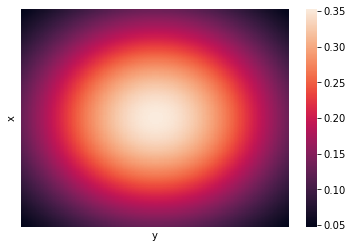

In [126]:
glue = f.pivot(index="x", columns="y", values="z")
sns.heatmap(glue.iloc[::-1],xticklabels=False,yticklabels=False)

In [32]:
u1

0.6206783056617066

In [79]:
u= np.random.uniform(size=(2,100))

In [80]:
u

array([[0.74378204, 0.91060258, 0.09045098, 0.26070059, 0.64597749,
        0.9702194 , 0.3922568 , 0.15559413, 0.96056855, 0.15794607,
        0.8582336 , 0.42790467, 0.94551297, 0.23498688, 0.86174055,
        0.62742365, 0.23357567, 0.92810835, 0.05003204, 0.017962  ,
        0.0251644 , 0.40057713, 0.94136979, 0.29409208, 0.36458731,
        0.64567992, 0.03579314, 0.16542405, 0.44172459, 0.64454745,
        0.79442768, 0.25360662, 0.98150457, 0.15696409, 0.98172432,
        0.75219838, 0.22518408, 0.8282964 , 0.64255705, 0.65503782,
        0.75350794, 0.00539943, 0.06810691, 0.11627027, 0.38619913,
        0.417868  , 0.69554698, 0.7317389 , 0.11122948, 0.05214979,
        0.0688803 , 0.10409162, 0.51277225, 0.17783848, 0.78786883,
        0.15135412, 0.49612857, 0.677249  , 0.97966768, 0.13619344,
        0.47749235, 0.58166766, 0.64862066, 0.5911907 , 0.42603886,
        0.80988427, 0.87372493, 0.39097542, 0.58008038, 0.42265544,
        0.31313337, 0.37337965, 0.75140398, 0.21

In [150]:
xi

0.8014343052391922

In [151]:
sf.erf(sf.erfinv(.5))

0.5